## Multiple Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Load CSV and columns
df = pd.read_csv("Housing.csv")
df.head()

Unnamed: 0    price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0     5850         3        1        2      yes      no   
1           2  38500.0     4000         2        1        1      yes      no   
2           3  49500.0     3060         3        1        1      yes      no   
3           4  60500.0     6650         3        1        2      yes     yes   
4           5  61000.0     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no

In [4]:
Y = df['price']
Y=Y.values
Y=Y.reshape(len(Y),1)
print(Y)

[[ 42000.]
 [ 38500.]
 [ 49500.]
 [ 60500.]
 [ 61000.]
 [ 66000.]
 [ 66000.]
 [ 69000.]
 [ 83800.]
 [ 88500.]
 [ 90000.]
 [ 30500.]
 [ 27000.]
 [ 36000.]
 [ 37000.]
 [ 37900.]
 [ 40500.]
 [ 40750.]
 [ 45000.]
 [ 45000.]
 [ 48500.]
 [ 65900.]
 [ 37900.]
 [ 38000.]
 [ 42000.]
 [ 42300.]
 [ 43500.]
 [ 44000.]
 [ 44500.]
 [ 44900.]
 [ 45000.]
 [ 48000.]
 [ 49000.]
 [ 51500.]
 [ 61000.]
 [ 61000.]
 [ 61700.]
 [ 67000.]
 [ 82000.]
 [ 54500.]
 [ 66500.]
 [ 70000.]
 [ 82000.]
 [ 92000.]
 [ 38000.]
 [ 44000.]
 [ 41000.]
 [ 43000.]
 [ 48000.]
 [ 54800.]
 [ 55000.]
 [ 57000.]
 [ 68000.]
 [ 95000.]
 [ 38000.]
 [ 25000.]
 [ 25245.]
 [ 56000.]
 [ 35500.]
 [ 30000.]
 [ 48000.]
 [ 48000.]
 [ 52000.]
 [ 54000.]
 [ 56000.]
 [ 60000.]
 [ 60000.]
 [ 67000.]
 [ 47000.]
 [ 70000.]
 [ 45000.]
 [ 51000.]
 [ 32500.]
 [ 34000.]
 [ 35000.]
 [ 36000.]
 [ 45000.]
 [ 47000.]
 [ 55000.]
 [ 63900.]
 [ 50000.]
 [ 35000.]
 [ 50000.]
 [ 43000.]
 [ 55500.]
 [ 57000.]
 [ 60000.]
 [ 78000.]
 [ 35000.]
 [ 44000.]
 [ 47000.]

In [6]:
X = df[['lotsize','bedrooms','bathrms','stories','garagepl']]
print(type(X))
print(X)

<class 'pandas.core.frame.DataFrame'>
     lotsize  bedrooms  bathrms  stories  garagepl
0       5850         3        1        2         1
1       4000         2        1        1         0
2       3060         3        1        1         0
3       6650         3        1        2         0
4       6360         2        1        1         0
5       4160         3        1        1         0
6       3880         3        2        2         2
7       4160         3        1        3         0
8       4800         3        1        1         0
9       5500         3        2        4         1
10      7200         3        2        1         3
11      3000         2        1        1         0
12      1700         3        1        2         0
13      2880         3        1        1         0
14      3600         2        1        1         0
15      3185         2        1        1         0
16      3300         3        1        2         1
17      5200         4        1        3    

In [23]:
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('Housing.csv')
df.head()
lot=df[['lotsize']]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledlot = scaler.fit_transform(lot) 
df['rlot']=rescaledlot
X = df[['rlot','bedrooms','bathrms','stories','garagepl']]
X.head()

C:\Users\mozhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


rlot  bedrooms  bathrms  stories  garagepl
0  0.288660         3        1        2         1
1  0.161512         2        1        1         0
2  0.096907         3        1        1         0
3  0.343643         3        1        2         0
4  0.323711         2        1        1         0

In [7]:
# Split the data into training/testing sets
X_train = X[:-46]
X_test = X[-46:]
 
# Split the targets into training/testing sets
Y_train = Y[:-46]
Y_test = Y[-46:]

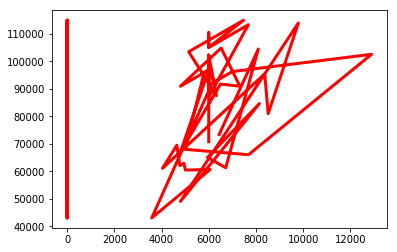

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

Y_pred=regr.predict(X_test)


In [10]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print(rms)

15019.102310598497


In [11]:
#using PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
x=df[['lotsize','bedrooms','bathrms','stories','garagepl']]
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[ 6.99734462e+02]
 [-1.15026574e+03]
 [-2.09026568e+03]
 [ 1.49973431e+03]
 [ 1.20973423e+03]
 [-9.90265690e+02]
 [-1.27026533e+03]
 [-9.90265623e+02]
 [-3.50265698e+02]
 [ 3.49734578e+02]
 [ 2.04973474e+03]
 [-2.15026573e+03]
 [-3.45026563e+03]
 [-2.27026567e+03]
 [-1.55026573e+03]
 [-1.96526573e+03]
 [-1.85026551e+03]
 [ 4.97344151e+01]
 [-1.70026578e+03]
 [-1.16426555e+03]
 [-3.65265525e+02]
 [-6.40265565e+02]
 [-1.15026565e+03]
 [-1.21626574e+03]
 [-1.90265752e+02]
 [-2.15026569e+03]
 [-1.35026574e+03]
 [-1.90265752e+02]
 [-2.15026568e+03]
 [-6.50265661e+02]
 [-1.65026573e+03]
 [-1.65026532e+03]
 [-1.15026574e+03]
 [-6.50265746e+02]
 [ 1.20973426e+03]
 [-6.50265466e+02]
 [-1.11826574e+03]
 [ 1.97343974e+01]
 [ 2.49734704e+02]
 [-2.00026568e+03]
 [-1.40526565e+03]
 [-6.30265661e+02]
 [-5.10265471e+02]
 [ 3.42973476e+03]
 [-3.15026568e+03]
 [-2.99026563e+03]
 [-2.11026573e+03]
 [-2.06026564e+03]
 [-1.90265582e+02]
 [-1.80026565e+03]
 [ 1.49734477e+02]
 [-1.05026564e+03]
 [ 4.0157344

In [12]:
df['pca1']=principalComponents
x=df['pca1']
x=x.values
x=x.reshape(len(x),1)
print(x)

[[ 6.99734462e+02]
 [-1.15026574e+03]
 [-2.09026568e+03]
 [ 1.49973431e+03]
 [ 1.20973423e+03]
 [-9.90265690e+02]
 [-1.27026533e+03]
 [-9.90265623e+02]
 [-3.50265698e+02]
 [ 3.49734578e+02]
 [ 2.04973474e+03]
 [-2.15026573e+03]
 [-3.45026563e+03]
 [-2.27026567e+03]
 [-1.55026573e+03]
 [-1.96526573e+03]
 [-1.85026551e+03]
 [ 4.97344151e+01]
 [-1.70026578e+03]
 [-1.16426555e+03]
 [-3.65265525e+02]
 [-6.40265565e+02]
 [-1.15026565e+03]
 [-1.21626574e+03]
 [-1.90265752e+02]
 [-2.15026569e+03]
 [-1.35026574e+03]
 [-1.90265752e+02]
 [-2.15026568e+03]
 [-6.50265661e+02]
 [-1.65026573e+03]
 [-1.65026532e+03]
 [-1.15026574e+03]
 [-6.50265746e+02]
 [ 1.20973426e+03]
 [-6.50265466e+02]
 [-1.11826574e+03]
 [ 1.97343974e+01]
 [ 2.49734704e+02]
 [-2.00026568e+03]
 [-1.40526565e+03]
 [-6.30265661e+02]
 [-5.10265471e+02]
 [ 3.42973476e+03]
 [-3.15026568e+03]
 [-2.99026563e+03]
 [-2.11026573e+03]
 [-2.06026564e+03]
 [-1.90265582e+02]
 [-1.80026565e+03]
 [ 1.49734477e+02]
 [-1.05026564e+03]
 [ 4.0157344

In [13]:
# Split the data into training/testing sets
x_train = x[:-46]
x_test = x[-46:]
 
# Split the targets into training/testing sets
Y_train = Y[:-46]
Y_test = Y[-46:]

In [14]:
# Create linear regression object
regr1 = linear_model.LinearRegression()
 
# Train the model using the training sets
regr1.fit(x_train, Y_train)

Y_pred=regr1.predict(x_test)


In [15]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print(rms)

24492.997107936302
